<a href="https://colab.research.google.com/github/shekhar-banerjee96/deep_learning_training/blob/main/CNN_Padding_Stride_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digits classification dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
y_train[0]

5

# Case 1 : Without padding

In [6]:
# Building CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation="relu", input_shape=(28,28,1)))

# please note, padding = "valid" means there is no padding applied
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu'))

model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2002698 (7.64 MB)
Trainable params: 200269

# Case 2 - With padding
## Building CNN Model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation="relu", input_shape=(28,28,1)))
# please note, padding = "same" means there is padding applied
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))

model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3231498 (12.33 MB)
Trainable params: 323

# Case 3 - use stride and padding togehter

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=(2,2), activation="relu", input_shape=(28,28,1)))
# please note, padding = "same" means there is padding applied
model.add(Conv2D(32,kernel_size=(3,3), padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', strides=(2,2),activation='relu'))

model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 85770 (335.04 KB)
Trainable params: 8577

In [9]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.2010 - accuracy: 0.9372 - val_loss: 0.0591 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9801 - val_loss: 0.0589 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0384 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0361 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0423 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0416 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0459 - val_accurac

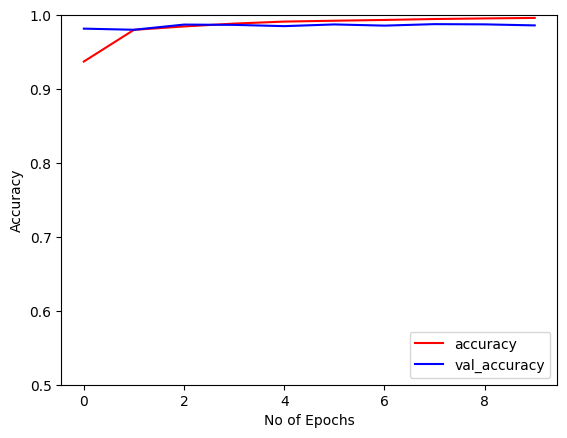

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label ='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')
plt.show()

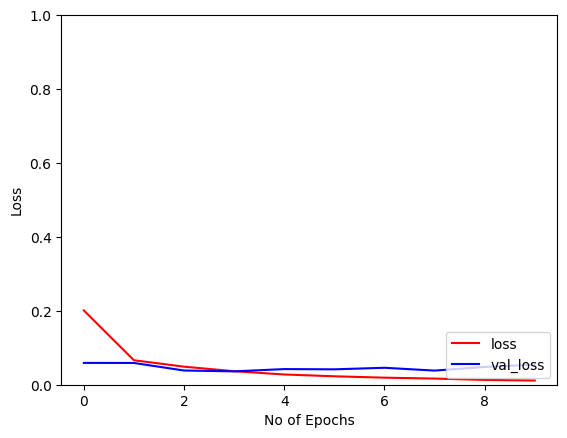

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label ='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

In [13]:
from keras.layers import MaxPooling2D

In [14]:
# Case 4 - apply Max-Pooling Layer as well
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=(2,2), activation="relu", input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same',strides=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', strides=(2,2),activation='relu'))


model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 32)          9248      
                                                                 
 flatten_3 (Flatten)         (None, 32)               

In [15]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2961 - accuracy: 0.9072 - val_loss: 0.1022 - val_accuracy: 0.9677
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0.0813 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.0754 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0558 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.0531 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0506 - val_accuracy:

# CIFAR10 small images classification dataset

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [18]:
x_train, x_test = x_train/255.0 , x_test/255.0

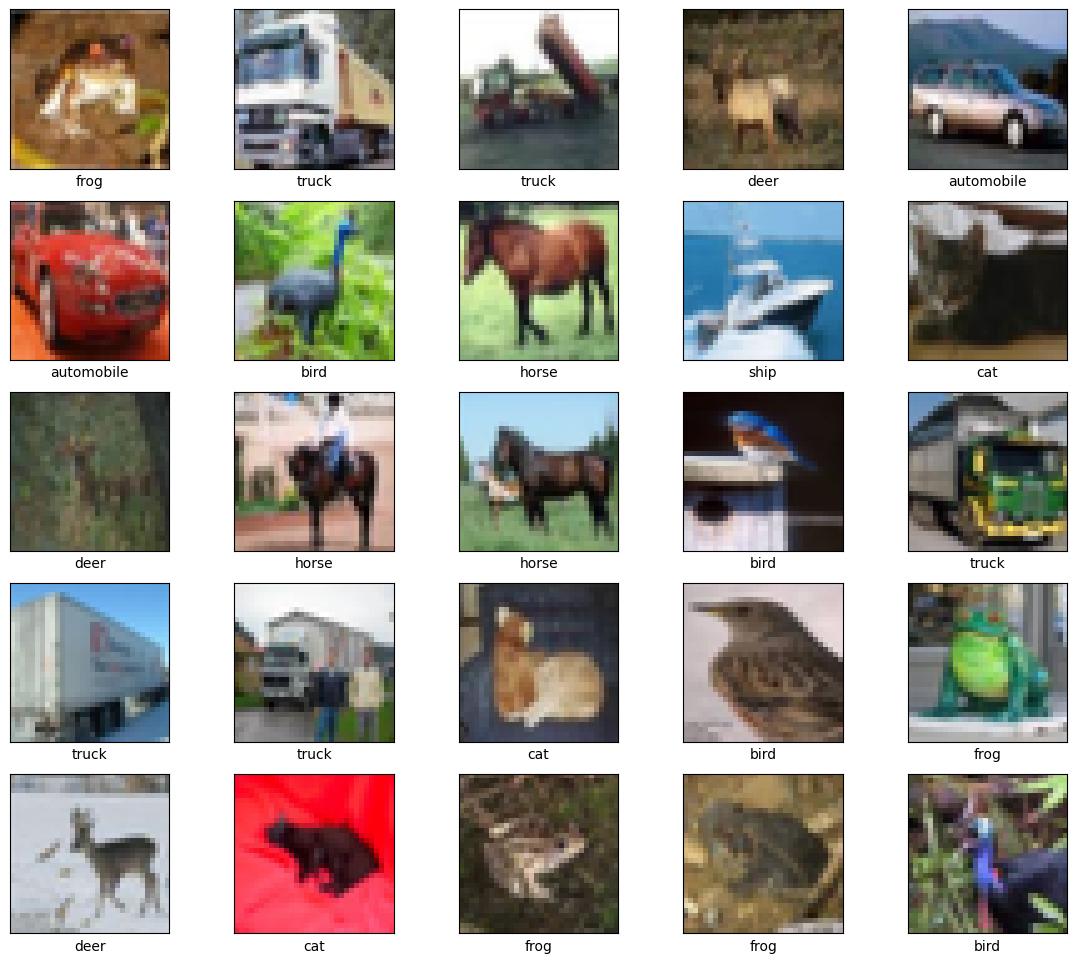

In [19]:
Class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(14,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(Class_names[y_train[i][0]])
plt.show()

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', strides=1, activation='relu', input_shape=(32,32,3)))
# Channel = 1 means grayscale and 3 means RGB (red green blue)
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid',strides=1))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid',strides=1))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='valid',strides=1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 29, 29, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 32)       

In [25]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.6102 - accuracy: 0.4095 - val_loss: 1.3240 - val_accuracy: 0.5168
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2880 - accuracy: 0.5408 - val_loss: 1.3592 - val_accuracy: 0.5289
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1599 - accuracy: 0.5870 - val_loss: 1.2535 - val_accuracy: 0.5625
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0582 - accuracy: 0.6241 - val_loss: 1.0523 - val_accuracy: 0.6269
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9835 - accuracy: 0.6519 - val_loss: 1.0128 - val_accuracy: 0.6430
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9228 - accuracy: 0.6747 - val_loss: 1.0191 - val_accuracy: 0.6470
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8695 - accuracy: 0.6925 - val_loss: 1.0113 - val_acc